****This notebook uses the VAE model trained on QM9 to explor the latent space representation and perform PCA on it.****

In [2]:
import os
import numpy as np
import pandas as pd
import selfies
import glob
import torch
import chemistry_vae_selfies_carlos as vae
import data_loader_carlos
import importlib
import chemestry_perceptron as cp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [8]:
# here we want to read in data and tranform them into one_hot
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder_path = "./datasets/"
file_name = "SelectedSMILES_QM9.txt"

full_path = folder_path + file_name

selfies_list, selfies_alphabet, largest_selfies_len, smiles_list, smiles_alphabet, largest_smiles_len = vae.get_selfie_and_smiles_encodings_for_dataset(full_path)

--> Translating SMILES to SELFIES...
Finished translating SMILES to SELFIES.
selfies aplhabet: ['[F]', '[C]', '[#Branch1]', '[nop]', '[=C]', '[=Branch2]', '[N]', '[=O]', '[Branch2]', '[#N]', '[O]', '[#Branch2]', '[Ring1]', '[#C]', '[=N]', '[=Branch1]', '[Ring2]', '[Branch1]']
smiles aplhabet: ['F', '5', 'O', ')', '3', '#', 'N', '=', 'C', '(', '4', '2', '1', ' ']


In [4]:
# define source file location
file_to_load =  "./saved_models_RNN/"
#file_to_load =  "./model runs/saved_models_run1/"
#file_to_load =  "./saved_models_run1/"
# training file name encoder
training_file_nameE = "300/E"
# training file name decoder
training_file_nameD = "300/D"
# load data
#load_data_trained = file_to_load + training_file_nameE
# Alphabet has 18 letters, largest molecule is 21 letters. (build this as an output function later ... )
largest_selfies_len_dataset = largest_selfies_len
largest_smiles_len_dataset = largest_smiles_len

#in_dimension = len(selfies_alphabet)*largest_selfies_len
in_dimension = len(smiles_alphabet)*largest_smiles_len


# load the trained encoder
vae_encoder = torch.load(file_to_load + training_file_nameE) #, map_location=torch.device(device="cpu"))
#print(vae_encoder)

# load the trained decoder
vae_decoder = torch.load(file_to_load + training_file_nameD) #, map_location=torch.device(device="cpu"))
#print(vae_decoder)

In [7]:
print(selfies_alphabet)

selfies_alphabet_new = ['[#Branch2]', '[Ring2]', '[Branch2]', '[=Branch2]', '[O]', '[=O]', '[=C]', '[=N]', '[#Branch1]', '[=Branch1]', '[nop]', '[N]', '[Branch1]', '[F]', '[#C]', '[#N]', '[Ring1]', '[C]']

print(selfies_alphabet_new)

['[F]', '[C]', '[#Branch1]', '[nop]', '[=C]', '[=Branch2]', '[N]', '[=O]', '[Branch2]', '[#N]', '[O]', '[#Branch2]', '[Ring1]', '[#C]', '[=N]', '[=Branch1]', '[Ring2]', '[Branch1]']
['[#Branch2]', '[Ring2]', '[Branch2]', '[=Branch2]', '[O]', '[=O]', '[=C]', '[=N]', '[#Branch1]', '[=Branch1]', '[nop]', '[N]', '[Branch1]', '[F]', '[#C]', '[#N]', '[Ring1]', '[C]']


In [9]:
##The file you want to train on, should contain SMILES reps, latent space reps and properties
my_file = pd.read_csv('./datasets/QM9listprops.csv', index_col=None)
my_file.dropna()

list_of_properties = []


for i in range(len(my_file)):

    DipoleIn = my_file['dipole_moment'][i]
    GapIn = my_file['energy_gap'][i]
    SMILESCodeIn = my_file['smiles'][i]
    list_of_properties.append([SMILESCodeIn, GapIn, DipoleIn])

In [10]:
# select the molecules without pentabonds and create latent space vectors 
smiles_rep, latent_rep, props_used = cp.filter(list_of_properties, largest_selfies_len_dataset, selfies_alphabet, vae_encoder, vae_decoder)

vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector skipped
vector ski

In [38]:
props_used

[[0.2818, 5.0509],
 [0.2271, 2.5256],
 [0.3036, 1.5279],
 [0.2451, 2.11],
 [0.3048, 2.786],
 [0.2616, 2.6416],
 [0.2485, 2.8597],
 [0.2883, 1.9466],
 [0.2025, 7.3954],
 [0.2635, 1.9482],
 [0.2194, 4.6918],
 [0.2125, 2.3546],
 [0.2229, 3.4897],
 [0.1868, 3.9819],
 [0.2924, 3.6553],
 [0.2435, 4.6856],
 [0.2708, 4.9905],
 [0.2315, 4.9766],
 [0.2083, 4.9136],
 [0.2243, 3.376],
 [0.1919, 1.8729],
 [0.2065, 1.8824],
 [0.2552, 4.8613],
 [0.3087, 0.8879],
 [0.3286, 2.5519],
 [0.2902, 1.4657],
 [0.2199, 3.1605],
 [0.2565, 2.2261],
 [0.1566, 0.4153],
 [0.3111, 1.2433],
 [0.2092, 4.4402],
 [0.2628, 1.662],
 [0.2324, 1.8087],
 [0.2758, 3.2558],
 [0.2883, 1.1835],
 [0.2694, 2.9101],
 [0.3191, 4.3027],
 [0.2564, 4.19],
 [0.1819, 5.4578],
 [0.2085, 5.6038],
 [0.1937, 4.8199],
 [0.2724, 1.8355],
 [0.2973, 1.2334],
 [0.245, 4.1342],
 [0.3237, 0.9424],
 [0.229, 2.423],
 [0.2154, 2.0187],
 [0.2348, 0.6138],
 [0.2217, 3.4295],
 [0.3241, 2.0032],
 [0.1958, 3.2757],
 [0.3038, 0.7834],
 [0.2903, 4.8997],
 [0

In [41]:
# Convert the datasets to Torch tensors

# Extract tensors from inner lists
tensorsext = [t[0] for t in latent_rep]

# Concatenate tensors
latent_space_vectors_PCA = torch.cat(tensorsext, dim=0)
#latent_space_vectors_PCA = torch.cat(latent_rep, dim=0)
latent_space_vectors_PCA = latent_space_vectors_PCA.squeeze(1).detach()
data_np = latent_space_vectors_PCA.numpy()  # Convert Torch tensor to NumPy array
# pick the property for the label, here the homo-lumo gap
labels_tensor =  [item[0] for item in props_used]

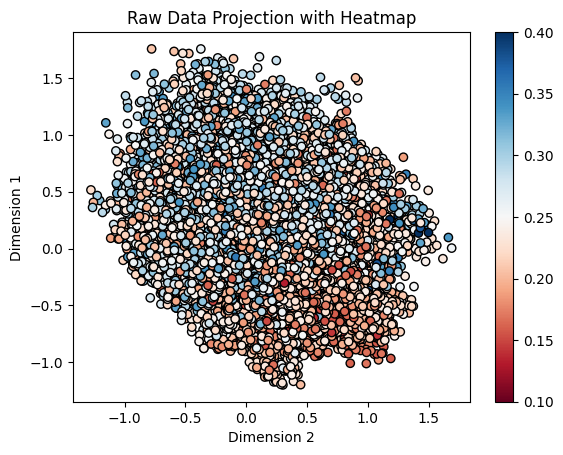

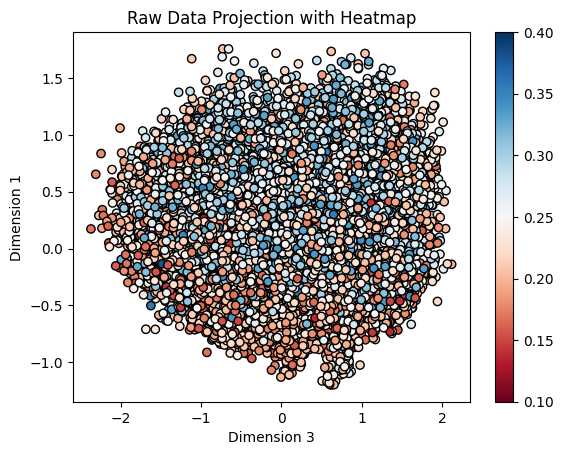

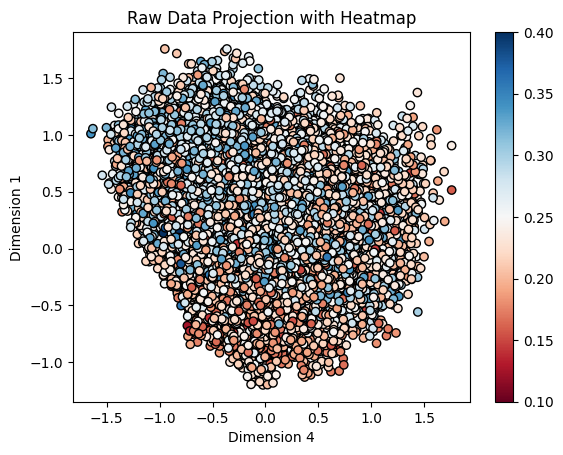

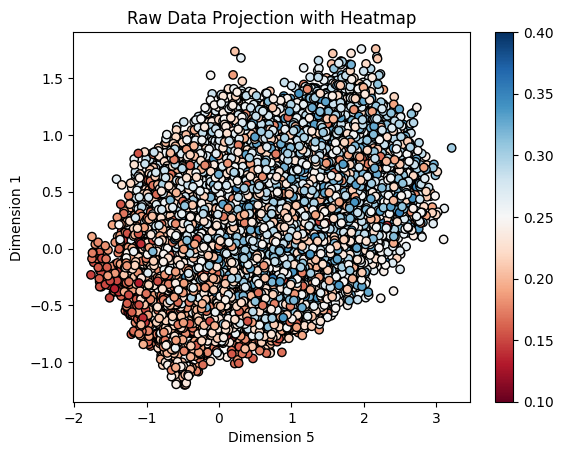

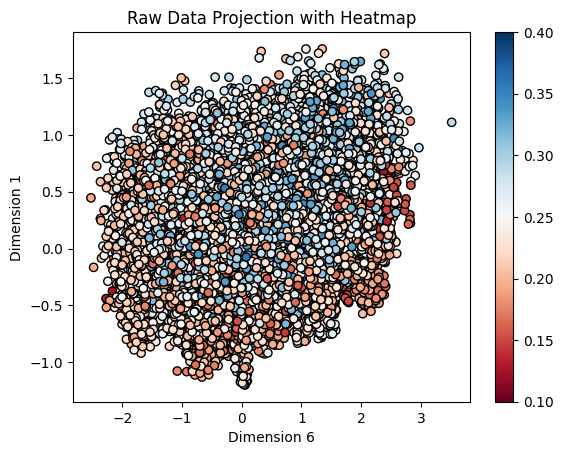

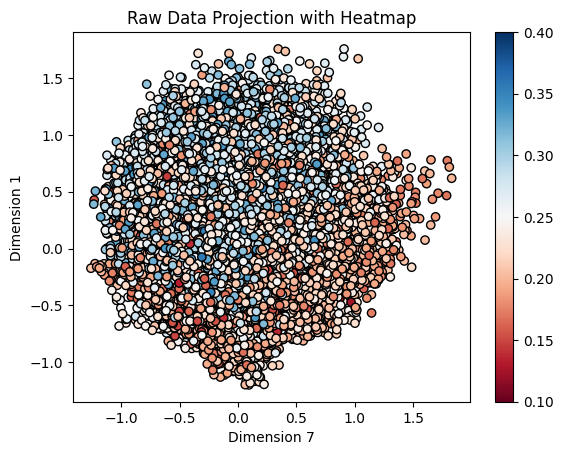

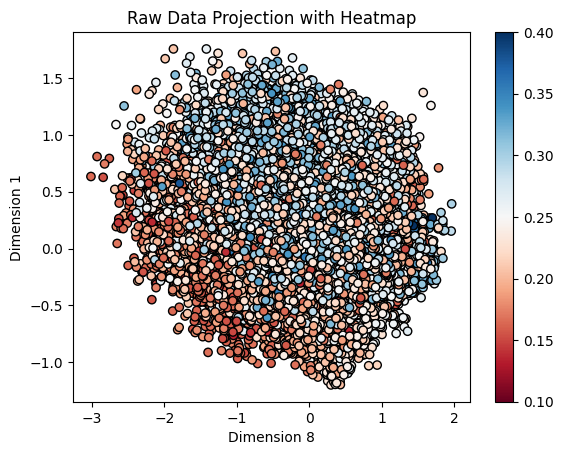

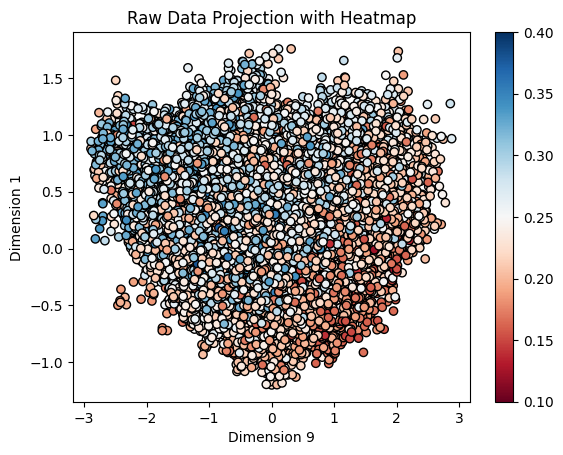

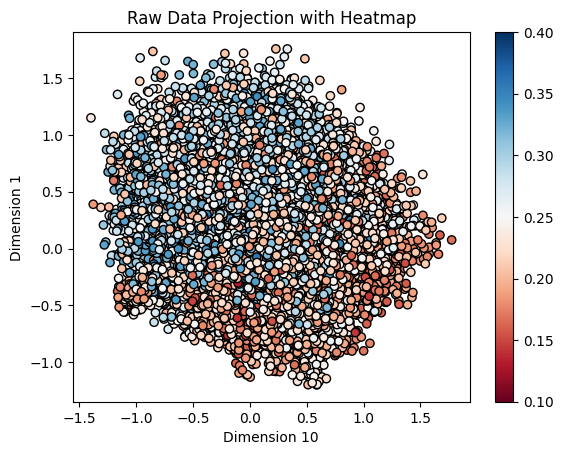

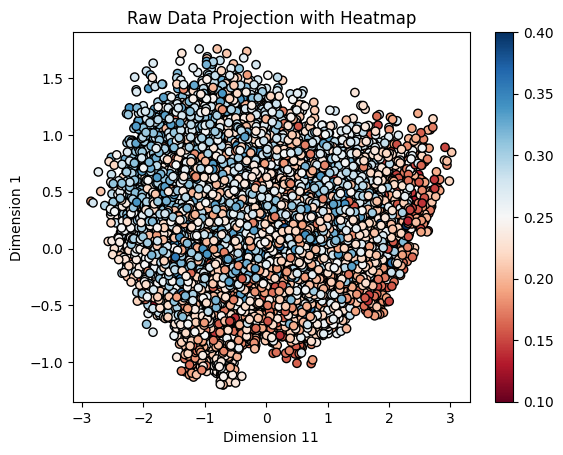

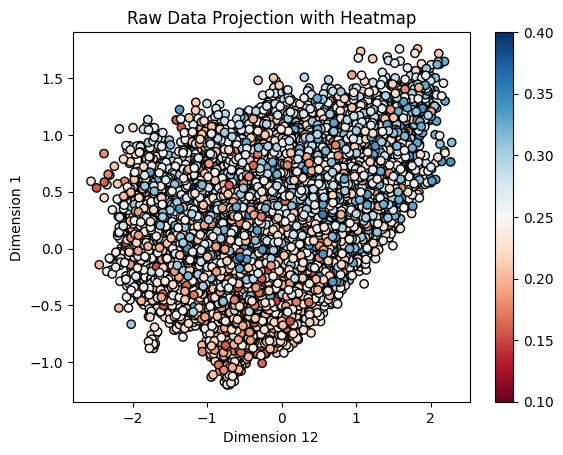

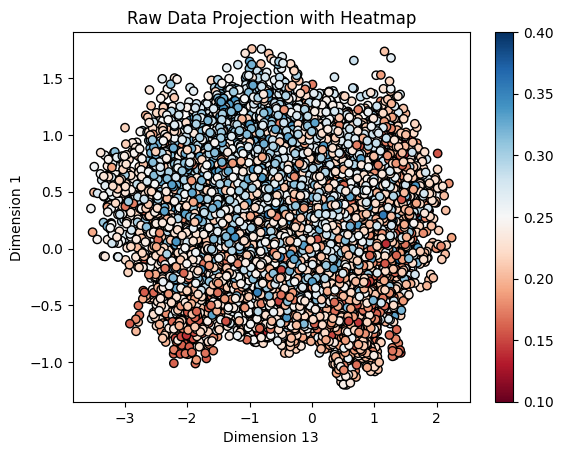

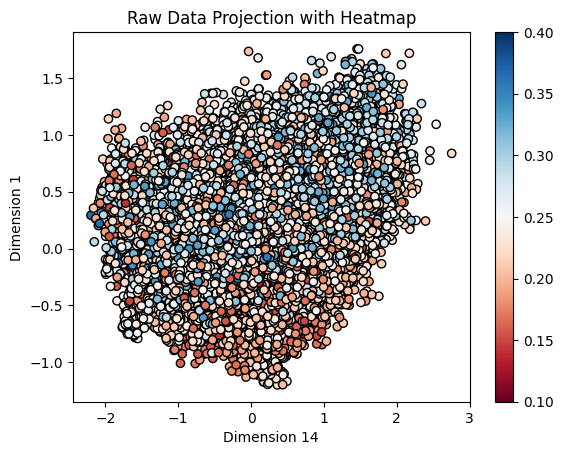

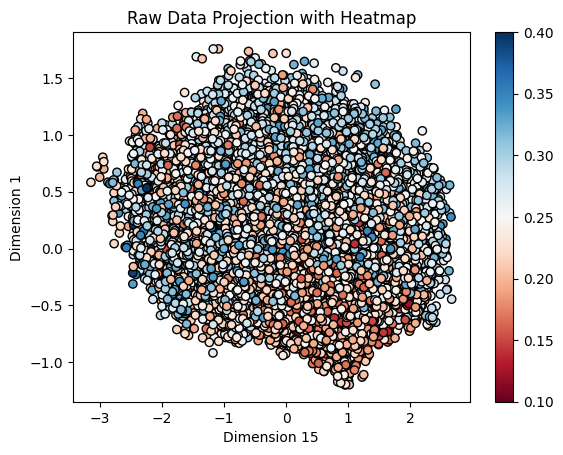

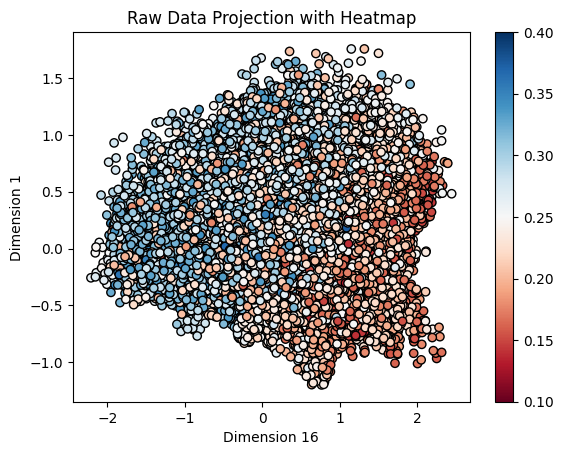

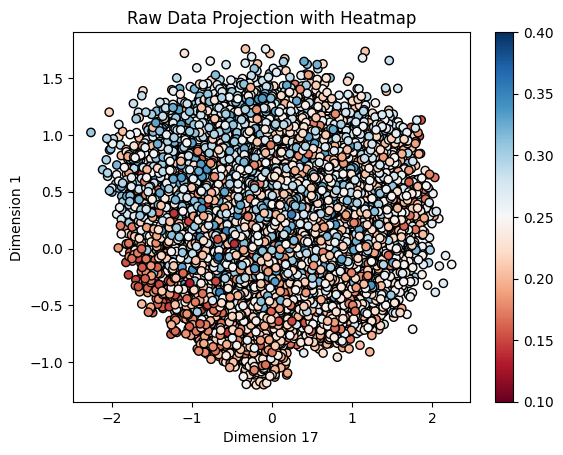

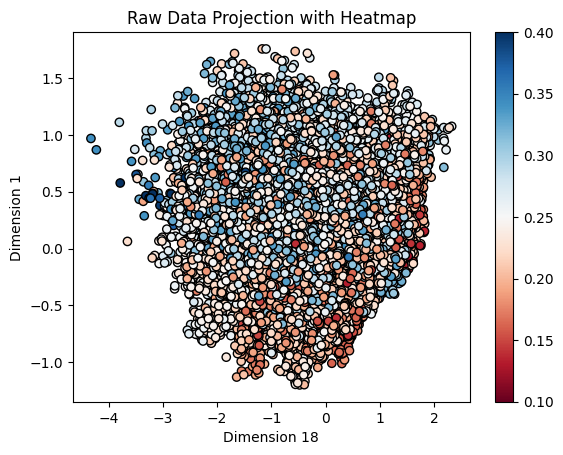

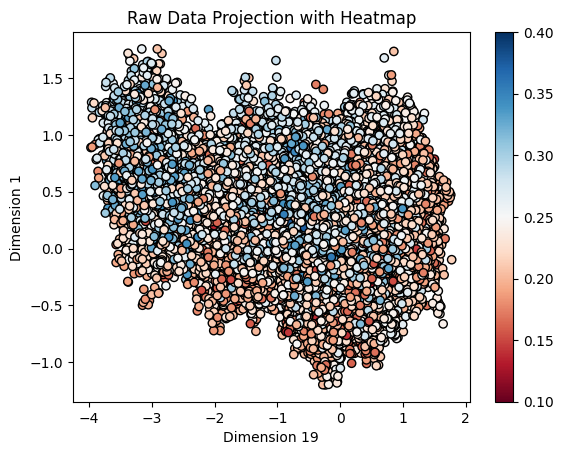

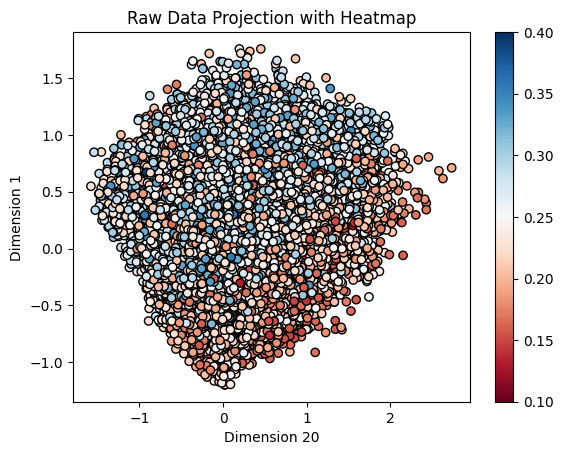

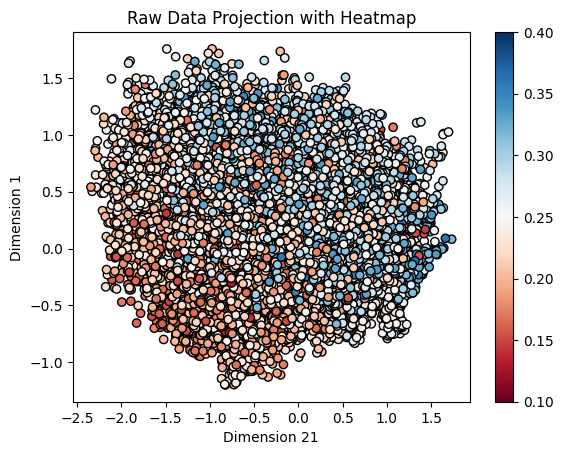

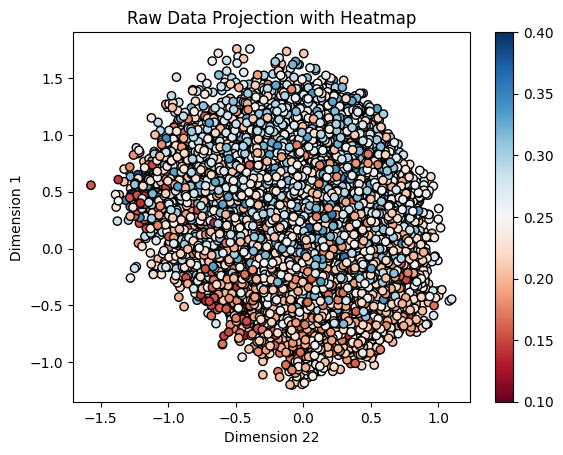

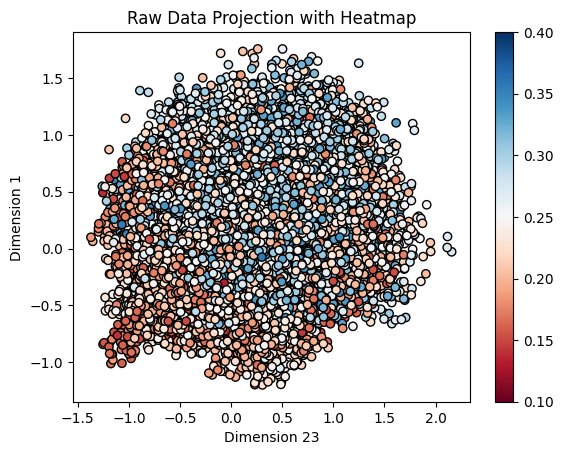

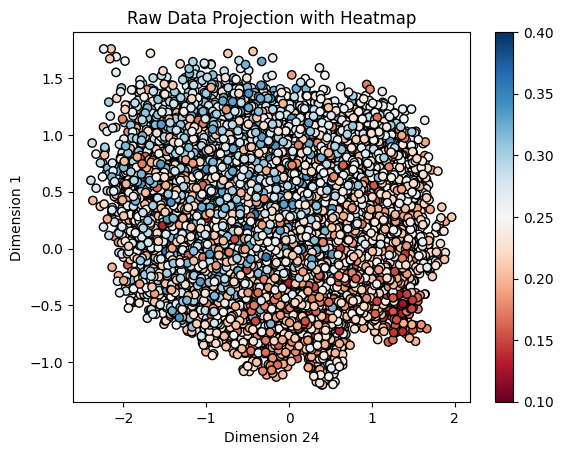

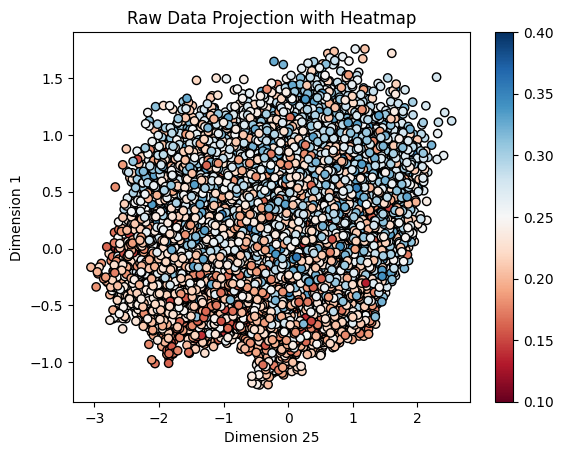

In [43]:
for i in range(25):
# Get the indices of the two most relevant dimensions (components)
    most_relevant_dimensions = [i,0]
    relevant_data = data_np[:, most_relevant_dimensions]

# Define the vmin and vmax for color mapping
    vmin = 0.1
    vmax = 0.4

    if i != 0:
# Create a scatter plot with heatmap color coding (red-blue colormap)
        plt.scatter(relevant_data[:, 0], relevant_data[:, 1], c=labels_tensor, cmap='RdBu', edgecolor='black', vmin=vmin, vmax=vmax)
        plt.colorbar()  # Add colorbar for the legend
        plt.xlabel('Dimension {}'.format(most_relevant_dimensions[0] + 1))
        plt.ylabel('Dimension {}'.format(most_relevant_dimensions[1] + 1))
        plt.title('Raw Data Projection with Heatmap')
        plt.show()

Try PCA data analysis below

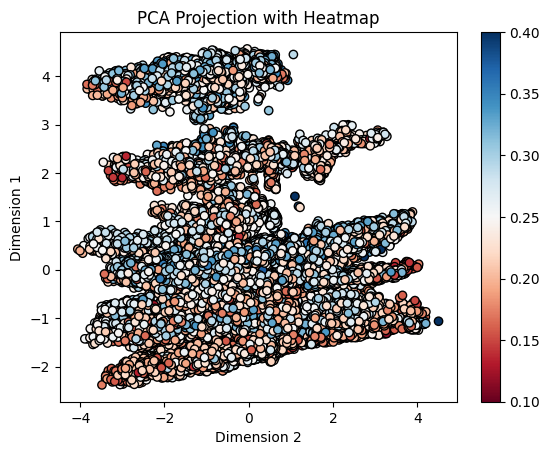

In [42]:
# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components you want to keep
data_pca = pca.fit_transform(data_np)

for i in range(1,2):
# Get the indices of the two most relevant dimensions (components)
    most_relevant_dimensions = [i,0]
    relevant_data = data_pca[:, most_relevant_dimensions]

# Define the vmin and vmax for color mapping
    vmin = 0.1
    vmax = 0.4

    if i != 0:
# Create a scatter plot with heatmap color coding (red-blue colormap)
        plt.scatter(relevant_data[:, 0], relevant_data[:, 1], c=labels_tensor, cmap='RdBu', edgecolor='black', vmin=vmin, vmax=vmax)
        plt.colorbar()  # Add colorbar for the legend
        plt.xlabel('Dimension {}'.format(most_relevant_dimensions[0] + 1))
        plt.ylabel('Dimension {}'.format(most_relevant_dimensions[1] + 1))
        plt.title('PCA Projection with Heatmap')
        plt.show()

In [324]:
# Get the transformation matrices (eigenvectors)
transformation_matrices = pca.components_

# Print the transformation matrices
print(len(transformation_matrices))
print(len(transformation_matrices[0]))
print(transformation_matrices[12])

25
25
[-0.29225326  0.09160306  0.2582865   0.00898831  0.19272669  0.14029503
 -0.30241653 -0.38226727  0.09501421  0.5177343  -0.03927571  0.11950755
 -0.13350102  0.16491553 -0.14083113  0.06429452 -0.05387606 -0.09205611
  0.33660403 -0.02833247  0.1618457   0.1568608  -0.03310027  0.06894851
  0.03123405]
